# Openalex database structure analysis

Table Name Analysis

Relationship between tables

List of columns in each table

Number of records in each table

Which columns are indexed in each table

In [2]:
from data_mining.connecting_postgresql_db import get_data_from_pg_db

In [11]:
# Function to list all tables in the database
def list_tables():
    # Define the query to list the tables in the 'openalex' schema
    query = "SELECT table_name FROM information_schema.tables WHERE table_schema = 'openalex';"

    # Fetch the data from the database using the get_data_from_pg_db function
    tables = get_data_from_pg_db(query)

    return tables

tables = list_tables()  # List all tables
print("Tables in the database:")
for table in tables:
    print(table['table_name'])  # Access the table name from the dictionary

Tables in the database:
authors_counts_by_year
authors_ids
concepts_related_concepts
institutions
concepts
publishers_counts_by_year
publishers_ids
sources
institutions_associated_institutions
concepts_ancestors
concepts_counts_by_year
concepts_ids
sources_counts_by_year
institutions_ids
authors
works_locations
publishers
institutions_counts_by_year
institutions_geo
works_authorships
works_biblio
works_concepts
works_ids
works_mesh
works_open_access
works_referenced_works
works_related_works
sources_ids
works
works_primary_locations
works_best_oa_locations


[OpenAlex API Entities Overview](https://docs.openalex.org/api-entities/entities-overview)


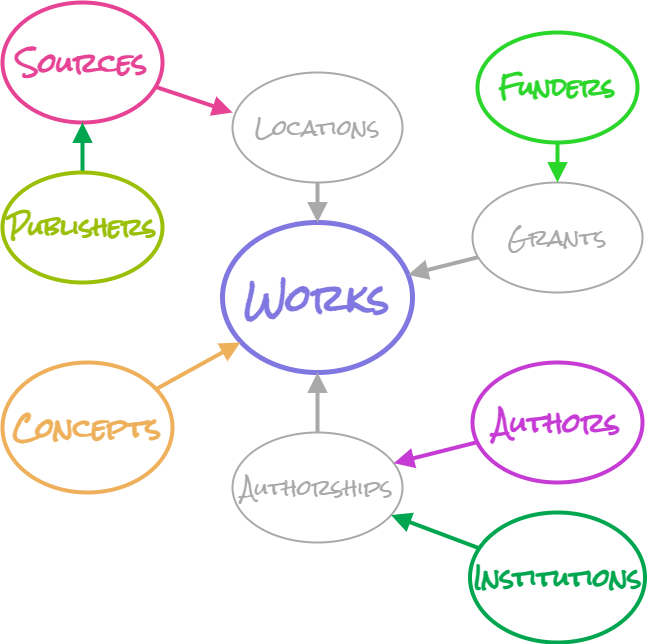

### Table and column names

In [3]:
# Function to describe a specific table (show column names and types)
def describe_table(table_name):
    try:
        # Define the query to describe the table
        query = f"SELECT column_name, data_type FROM information_schema.columns WHERE table_name = '{table_name}';"

        # Fetch columns data using the get_data_from_pg_db function
        columns = get_data_from_pg_db(query)

        # Display table name as a header
        print(f"\n{'='*50}")
        print(f"Description of table: {table_name}")
        print(f"{'='*50}\n")

        # Print column names and types in a tabular format
        print(f"{'Column Name':<30} {'Data Type'}")
        print("-" * 50)
        for column in columns:
            print(f"{column['column_name']:<30} {column['data_type']}")

        print(f"\n{'='*50}")

    except Exception as e:
        print(f"Error describing table {table_name}: {e}")


# Function to fetch the first few rows of a table
def preview_table_data(table_name, limit=5):
    try:
        # Define the query to preview data from the table
        query = f"SELECT * FROM {table_name} LIMIT {limit};"

        # Fetch rows data using the get_data_from_pg_db function
        rows = get_data_from_pg_db(query)

        print(f"Preview of data from table {table_name}:")
        for row in rows:
            print(row)
    except Exception as e:
        print(f"Error fetching data from {table_name}: {e}")

In [5]:
describe_table("institutions_geo")


Description of table: institutions_geo

Column Name                    Data Type
--------------------------------------------------
institution_id                 text
city                           text
geonames_city_id               text
region                         text
country_code                   text
country                        text
latitude                       real
longitude                      real



In [13]:
for table in tables:
    table_name = table['table_name']
    print(table_name)  # Access the table name from the dictionary

    # Call describe_table and preview_table_data for each table
    describe_table(table_name)  # Describe each table
    # preview_table_data(table_name)  # Preview data from each table

authors_counts_by_year

Description of table: authors_counts_by_year

Column Name                    Data Type
--------------------------------------------------
author_id                      text
year                           integer
works_count                    integer
cited_by_count                 integer
oa_works_count                 integer

authors_ids

Description of table: authors_ids

Column Name                    Data Type
--------------------------------------------------
author_id                      text
openalex                       text
orcid                          text
scopus                         text
twitter                        text
wikipedia                      text
mag                            bigint

concepts_related_concepts

Description of table: concepts_related_concepts

Column Name                    Data Type
--------------------------------------------------
concept_id                     text
related_concept_id             text
score     

### Estimated number of records


In [ ]:
query = """SELECT
    relname AS table_name,
    reltuples::bigint AS estimated_count
FROM
    pg_class
WHERE
    relkind = 'r'  -- only regular tables
    AND relname NOT LIKE 'pg_%'  -- filter out system tables
    AND relname NOT LIKE 'information_schema%'  -- filter out information tables
ORDER BY
    estimated_count DESC;  -- sort by number of rows
"""

# Fetch rows data using the get_data_from_pg_db function
rows = get_data_from_pg_db(query)

In [9]:
rows

[{'table_name': 'works_related_works', 'estimated_count': 2326144000},
 {'table_name': 'works_concepts', 'estimated_count': 2155224832},
 {'table_name': 'works_referenced_works', 'estimated_count': 1869081984},
 {'table_name': 'works_authorships', 'estimated_count': 694867776},
 {'table_name': 'works_mesh', 'estimated_count': 457321280},
 {'table_name': 'works_locations', 'estimated_count': 257477264},
 {'table_name': 'works_open_access', 'estimated_count': 244965152},
 {'table_name': 'works', 'estimated_count': 244834032},
 {'table_name': 'works_biblio', 'estimated_count': 244834032},
 {'table_name': 'works_ids', 'estimated_count': 244763088},
 {'table_name': 'authors_counts_by_year', 'estimated_count': 236881456},
 {'table_name': 'works_primary_locations', 'estimated_count': 192583408},
 {'table_name': 'authors_ids', 'estimated_count': 93003984},
 {'table_name': 'authors', 'estimated_count': 93003984},
 {'table_name': 'sources_counts_by_year', 'estimated_count': 1692707},
 {'table_na

### Index names in tables

In [ ]:
query = """SELECT
    tablename,
    indexname,
    indexdef
FROM
    pg_indexes
WHERE
    schemaname = 'openalex' 
ORDER BY
    tablename, indexname;"""

# Fetch rows data using the get_data_from_pg_db function
rows = get_data_from_pg_db(query)

In [11]:
rows

[{'tablename': 'authors',
  'indexname': 'author_by_id_idx',
  'indexdef': 'CREATE INDEX author_by_id_idx ON openalex.authors USING btree (id)'},
 {'tablename': 'authors_counts_by_year',
  'indexname': 'authors_counts_by_year_idx',
  'indexdef': 'CREATE INDEX authors_counts_by_year_idx ON openalex.authors_counts_by_year USING btree (author_id, year)'},
 {'tablename': 'authors_ids',
  'indexname': 'authors_ids_author_id_idx',
  'indexdef': 'CREATE INDEX authors_ids_author_id_idx ON openalex.authors_ids USING btree (author_id)'},
 {'tablename': 'authors_ids',
  'indexname': 'authors_ids_pkey',
  'indexdef': 'CREATE UNIQUE INDEX authors_ids_pkey ON openalex.authors_ids USING btree (author_id)'},
 {'tablename': 'concepts',
  'indexname': 'concepts_by_id_idx',
  'indexdef': 'CREATE INDEX concepts_by_id_idx ON openalex.concepts USING btree (id)'},
 {'tablename': 'concepts_ancestors',
  'indexname': 'concepts_ancestors_id_idx',
  'indexdef': 'CREATE INDEX concepts_ancestors_id_idx ON openalex

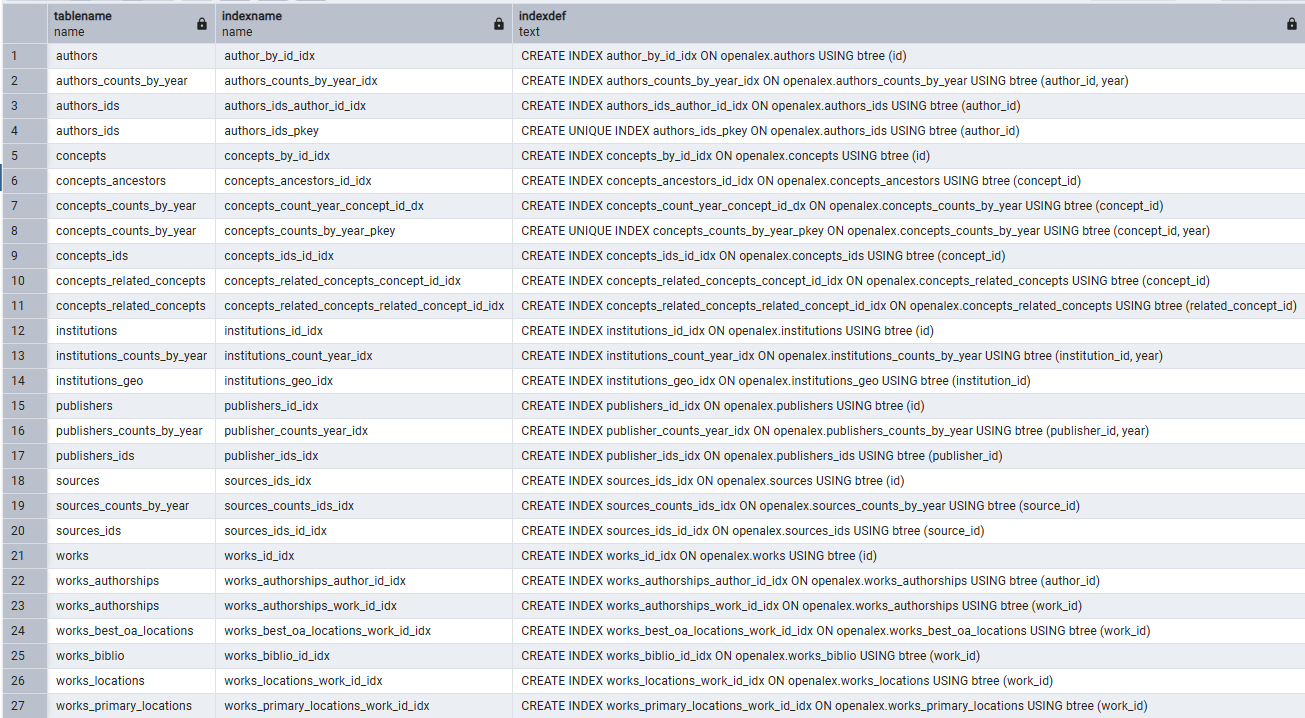

In [12]:
import pandas as pd

def print_data_structure(data):
    if not isinstance(data, list) or not all(isinstance(item, dict) for item in data):
        print("Invalid data structure. Expected a list of dictionaries.")
        return

    # Create a DataFrame from the list of dictionaries
    df = pd.DataFrame(data)

    # Print the DataFrame as a table
    return df

df = print_data_structure(rows)
df

,tablename,indexname,indexdef
0,authors,author_by_id_idx,CREATE INDEX author_by_id_idx ON openalex.auth...
1,authors_counts_by_year,authors_counts_by_year_idx,CREATE INDEX authors_counts_by_year_idx ON ope...
2,authors_ids,authors_ids_author_id_idx,CREATE INDEX authors_ids_author_id_idx ON open...
3,authors_ids,authors_ids_pkey,CREATE UNIQUE INDEX authors_ids_pkey ON openal...
4,concepts,concepts_by_id_idx,CREATE INDEX concepts_by_id_idx ON openalex.co...
5,concepts_ancestors,concepts_ancestors_id_idx,CREATE INDEX concepts_ancestors_id_idx ON open...
6,concepts_counts_by_year,concepts_count_year_concept_id_dx,CREATE INDEX concepts_count_year_concept_id_dx...
7,concepts_counts_by_year,concepts_counts_by_year_pkey,CREATE UNIQUE INDEX concepts_counts_by_year_pk...
8,concepts_ids,concepts_ids_id_idx,CREATE INDEX concepts_ids_id_idx ON openalex.c...
9,concepts_related_concepts,concepts_related_concepts_concept_id_idx,CREATE INDEX concepts_related_concepts_concept...
